In [273]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import sys
path_file = ('D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Datamanager')
sys.path.append(path_file)
from datamanager import DataManager
path_file = ('D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Calibrator')
sys.path.append(path_file)
from calibrator import Calibrator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from PyPDF2 import PdfFileMerger

# Procesamos los datos VAISALA

In [274]:
path_general = 'D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Cali\\Vaisala\\'
path_save = 'D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Reporte_MinCiencias'
#Obtenemos una lista del nombre de los archivos dentro de la carpeta
list_name = os.listdir(path_general)

#Iteramos para abrir cada archivo y concatenamos para tener un solo df

df_vaisala = []
for file in list_name:
    load_file = pd.read_csv(f'{path_general}{file}')
    df_vaisala.append(load_file)
df_vaisala = pd.concat(df_vaisala)

In [270]:
#Creamos una nueva columna organizando el formato de la fecha y la hora
df_vaisala['Date'] = list(map(lambda x: x[:17]+'00', df_vaisala.Date.values))
#Hacemos index la nueva columna
df_vaisala.index = pd.to_datetime(df_vaisala.Date)
#Eliminamos las columnas vieja de tiempo porque ya quedó el index
df_vaisala.drop(['Date'], axis = 1,inplace = True)

In [271]:
#Creamos la instancia de la clase con el df cargado
Datamanager = DataManager(dataframe = df_vaisala)
#Cargamos los datos en un dataframe del datamanager
df_cali_vais = Datamanager.load_data()

entre


In [261]:
df_cali_vais['NO (ug/m3)'].min()

-3.6

In [272]:
#Miramos la calidad de datos
Datamanager.show_period(df_cali_vais)

La fecha inical del conjunto de datos es 2023-03-23 22:11:00
La fecha final del conjunto de datos es 2023-03-25 17:06:00
La frecuencia del registro de datos es de cada 1 minutos
El rango de datos es de: 1 days 18:55:00
El dataset tiene en total 2574 registros 
El dataset no tiene datos repetidos
Los datos están incompletos, hay que reindexar
Los datos faltantes son
2023-03-24 07:29:00
2023-03-25 07:25:00
De los 2574 registros válidos el 0.0% fueron NAN.
Además, teniendo en cuenta la fecha inicial y final y la frecuencia de los registros
El máximo posible de registro es de 2576, en este sentido se determina que el sensor 
registró 99.92% del tiempo total


,NO2 (ug/m3),CO (ug/m3),O3 (ug/m3),NO (ug/m3),TEMP (C),HUM (%RH),PRES (hPa),Uptime (s)
2023-03-23 22:11:00,-1.5,-11109.3,92.2,501.4,25.9,60.8,902.0,858.0
2023-03-23 22:12:00,-2.3,-11427.4,91.5,589.2,25.9,60.4,902.0,918.0
2023-03-23 22:13:00,-3.4,-11002.8,90.6,655.6,25.9,60.5,902.0,978.0
2023-03-23 22:14:00,-3.4,-9329.2,90.0,704.0,25.9,60.0,902.1,1038.0
2023-03-23 22:15:00,-4.4,-7956.6,89.8,739.4,25.9,60.6,902.1,1098.0
2023-03-23 22:16:00,-2.3,-6777.9,84.8,762.4,25.8,59.2,902.1,1158.0
2023-03-23 22:17:00,-4.2,-5754.7,80.4,774.6,25.8,59.8,902.1,1218.0
2023-03-23 22:18:00,0.0,-4861.3,76.4,776.7,25.9,61.4,902.2,1278.0
2023-03-23 22:19:00,-1.0,-4072.3,72.6,772.8,25.9,62.1,902.2,1338.0
2023-03-23 22:20:00,-1.1,-3379.8,65.9,760.7,25.9,63.0,902.3,1398.0


In [193]:
def graphic(self, data, variable = 'PM2_5', unit = 'ppm', ylabel='',minvar=0, maxvar=1000, labelsize = 10,
                shape_figs = (1,1),  position = [0,0] ,color = '#056674', fig = plt.figure(figsize=(10,5))):
    fig = fig
    gs = gridspec.GridSpec(shape_figs[0],shape_figs[1])

    ax1=fig.add_subplot(gs[position[0],position[1]])
    ax11=ax1.plot(data.index,data[variable].values,'-',lw=1,label= variable,color=color)
    ax1.set_ylim(minvar,(maxvar)*1.1)
    #ax1.set_xlim(data.index[0], data.index[-1])
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%b-%d'))
    ax1.ser_ylabel(ylabel)
    ax1.tick_params(axis = 'y',color='gray', labelcolor='gray', labelsize=labelsize)
    ax1.tick_params(axis = 'x',color='gray', labelcolor='gray', labelsize=labelsize)
    ax1.grid(which='major',  linestyle='--', linewidth=0.5, color='lightgray')
    # ax1.set_title('Humedad', fontsize=20, fontproperties=prop, color='gray')
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))
    ax1.set_ylabel(f"{unit}", fontsize=labelsize,  color='gray')
    ax1.set_xlabel("Tiempo", fontsize=labelsize, color='gray')
    plt.legend(loc= 2, fontsize = labelsize)

    return fig

<Figure size 720x360 with 0 Axes>

KeyError: 'NO2'

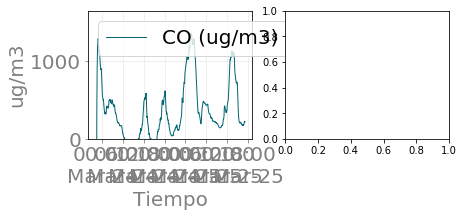

In [268]:
#Se genera una grafica
#Se crea la hoja donde se va a pintar
fig=plt.figure(figsize=(10,8))
#Se infica cuantas figuras tendrá la hoja 
gs = gridspec.GridSpec(4,4) #(filas, columnas)

CO = Datamanager.graphic(df_cali_vais,shape_figs=(3,3),position=[0,0],fig = fig,labelsize = 20,
                         variable = 'CO (ug/m3)',minvar = 0,maxvar = 1500,unit='ug/m3',color = '#056674')
NO2 = Datamanager.graphic(df_cali_vais,shape_figs=(3,3),position=[0,1],fig = fig,labelsize = 20,
                          variable = 'NO2',minvar = 0,maxvar = 140,unit='ug/m3',color = '#F14A16')
NOx = Datamanager.graphic(df_cali_vais,shape_figs=(3,3),position=[0,2],fig = fig,labelsize = 20,
                          variable = 'NO (ug/m3)',minvar = 1,maxvar = 60,unit='ug/m3',color = '#072227')
O3 = Datamanager.graphic(df_cali_vais,shape_figs=(3,3),position=[1,0],fig = fig,labelsize = 20,
                         variable = 'O3 (ug/m3)',minvar = 0,maxvar = 100,unit='ug/m3',color = '#FF4B5C')

Press = Datamanager.graphic(df_cali_vais,shape_figs=(3,3),position=[1,1],fig = fig,labelsize = 20,
                            variable = 'PRES (hPa)',minvar = 900,maxvar = 910,unit='hPa',color = '#533E85')
Temp = Datamanager.graphic(df_cali_vais,shape_figs=(3,3),position=[1,2],fig = fig,labelsize = 20,
                           variable = 'TEMP (C)',minvar = 10,maxvar = 40,unit='°C',color = 'green')
HM = Datamanager.graphic(df_cali_vais,shape_figs=(3,3),position=[2,0],fig = fig,labelsize = 20,
                         variable = 'HUM (%RH)',minvar = 40,maxvar = 100,unit='%',color = '#084594')
plt.subplots_adjust(left=0.1, bottom=0.1, right=2.8,top=2.2,wspace=0.2,hspace=0.4)
plt.savefig(f'{path_save}Series_Vaisala_Cali.png',bbox_inches="tight",
                                                    dpi = 200)

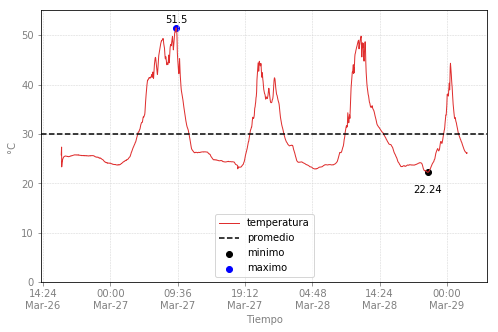

In [218]:
fig = plt.figure(figsize=(8,5))
fig_1 = Datamanager.graphic(df_cali_simple,'temperatura','°C',0,50,color='#DF2E2E',fig=fig)

min_x = np.argmin(df_cali_simple['temperatura'])
min_y = np.min(df_cali_simple['temperatura'])
min_y = round(min_y,2)

max_x = np.argmax(df_cali_simple['temperatura'])
max_y = np.max(df_cali_simple['temperatura'])
max_y = round(max_y,2)

plt.scatter(min_x, min_y,c='k',label='minimo')
plt.scatter(max_x, max_y,c='b',label='maximo')

plt.annotate(min_y,(min_x,min_y),textcoords="offset points",xytext=(0,-20),ha='center')
plt.annotate(max_y,(max_x,max_y),textcoords="offset points",xytext=(0,5),ha='center')

plt.axhline(y=np.nanmean(df_cali_simple['temperatura']),color='k', lw=1.5, ls='--', label="promedio")

plt.legend(loc='lower center')
plt.show()

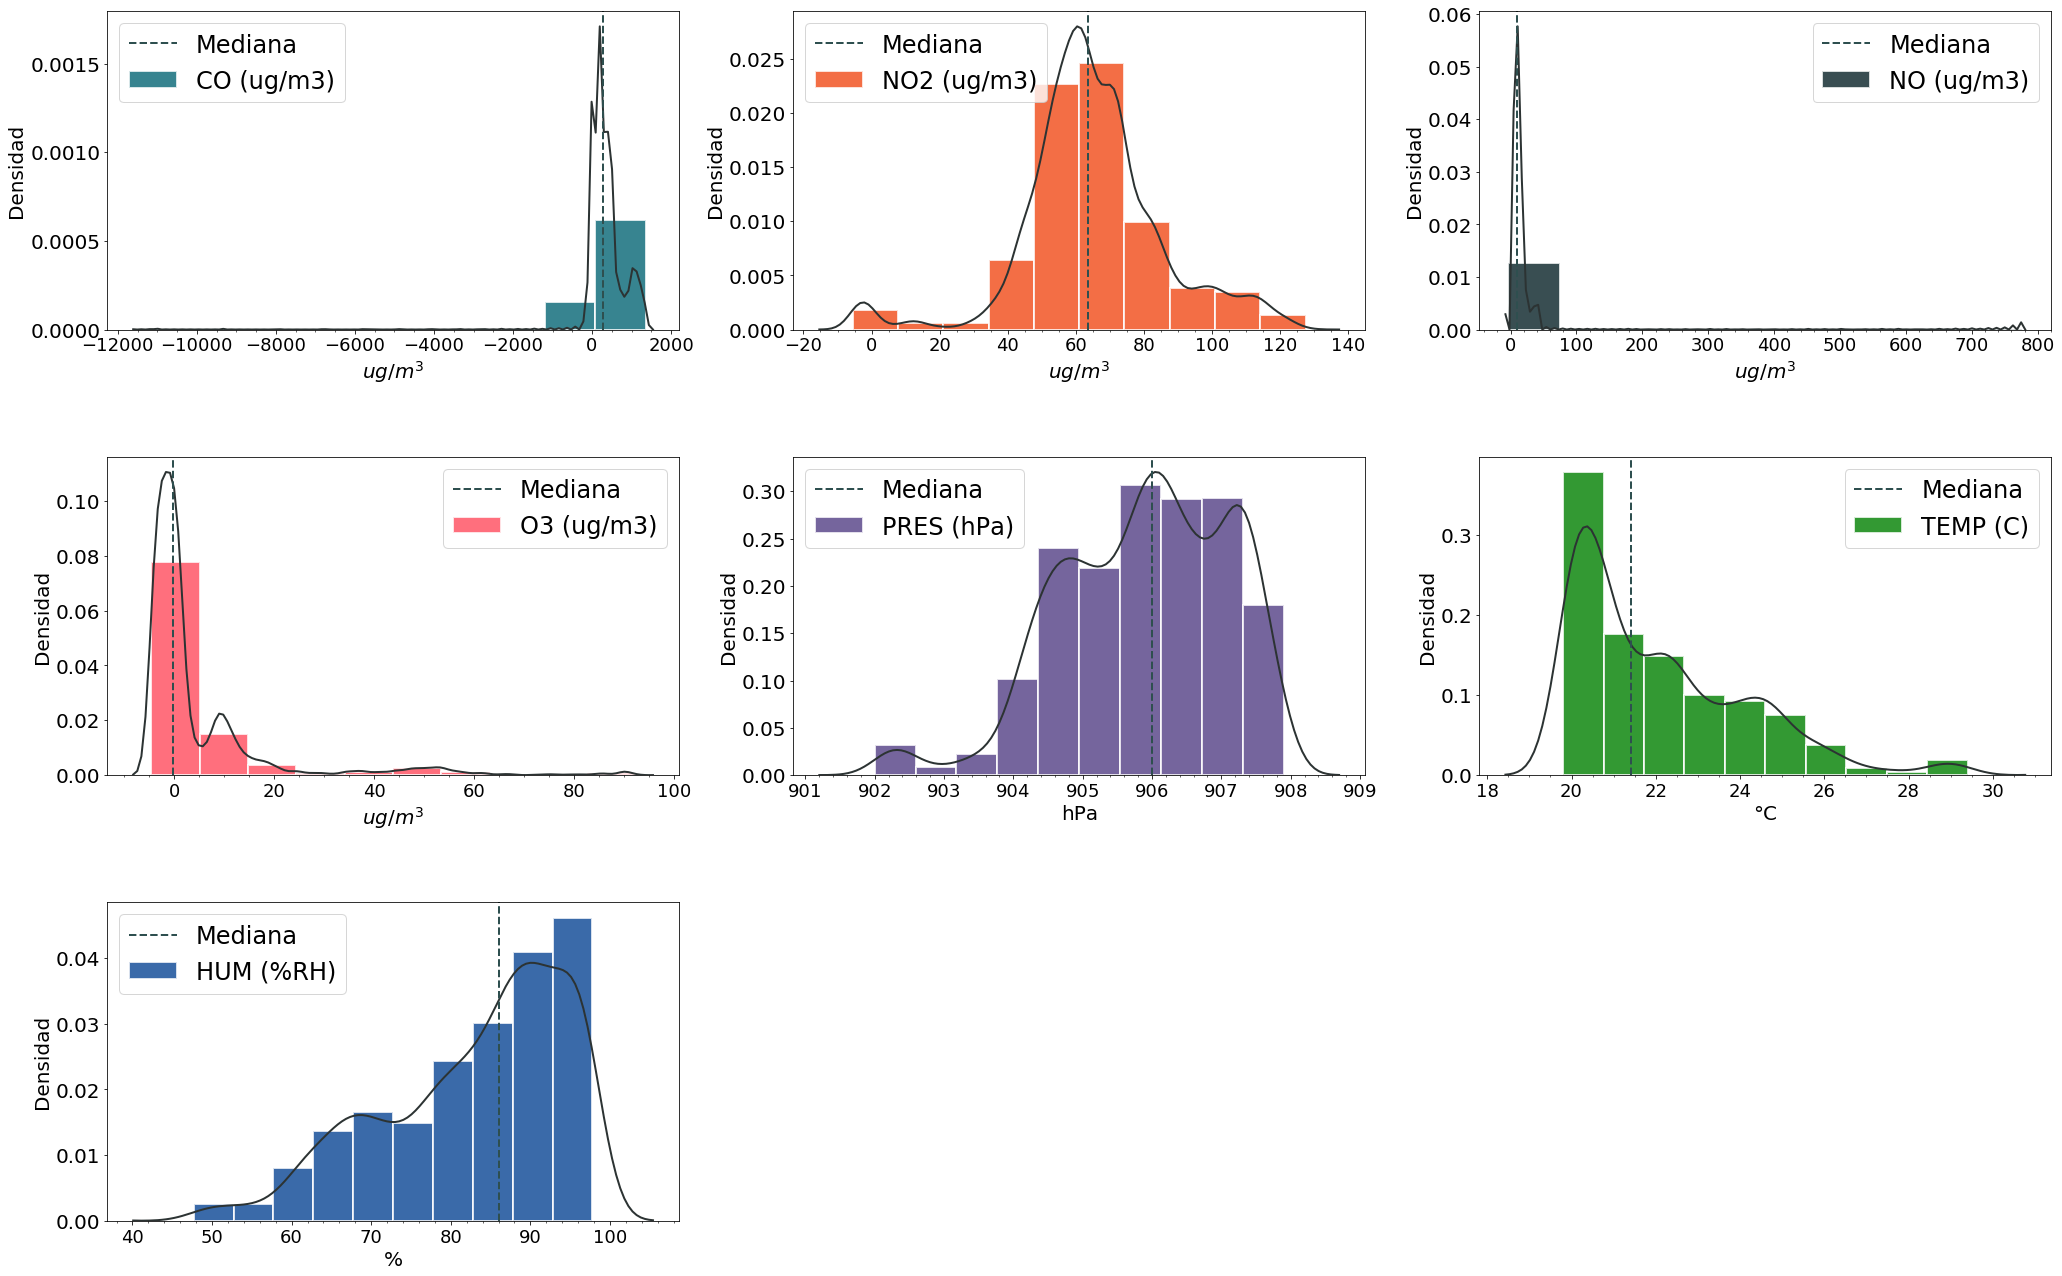

In [266]:
#Se genera una grafica
#Se crea la hoja donde se va a pintar
fig=plt.figure(figsize=(10,8))
#Se infica cuantas figuras tendrá la hoja 
gs = gridspec.GridSpec(4,4) #(filas, columnas)

CO = Datamanager.histogram(df_cali_vais,shape_figs=(3,3),position=[0,0],fig = fig,labelsize = 20,
                         variable = 'CO (ug/m3)',unit=r'$ug/m^{3}$',color_hist = '#056674')
NO2 = Datamanager.histogram(df_cali_vais,shape_figs=(3,3),position=[0,1],fig = fig,labelsize = 20,
                          variable = 'NO2 (ug/m3)',unit=r'$ug/m^{3}$',color_hist = '#F14A16')
NOx = Datamanager.histogram(df_cali_vais,shape_figs=(3,3),position=[0,2],fig = fig,labelsize = 20,
                          variable = 'NO (ug/m3)',unit=r'$ug/m^{3}$',color_hist = '#072227')
O3 = Datamanager.histogram(df_cali_vais,shape_figs=(3,3),position=[1,0],fig = fig,labelsize = 20,
                         variable = 'O3 (ug/m3)',unit=r'$ug/m^{3}$',color_hist = '#FF4B5C')

Press = Datamanager.histogram(df_cali_vais,shape_figs=(3,3),position=[1,1],fig = fig,labelsize = 20,
                            variable = 'PRES (hPa)',unit='hPa',color_hist = '#533E85')
Temp = Datamanager.histogram(df_cali_vais,shape_figs=(3,3),position=[1,2],fig = fig,labelsize = 20,
                             variable = 'TEMP (C)',unit='°C',color_hist = 'green')

HM = Datamanager.histogram(df_cali_vais,shape_figs=(3,3),position=[2,0],fig = fig,labelsize = 20,
                           variable = 'HUM (%RH)',unit='%',color_hist = '#084594')
plt.subplots_adjust(left=0.1, bottom=0.1, right=2.8,top=2.2,wspace=0.2,hspace=0.4)
plt.savefig(f'{path_save}Series_Vaisala_Cali.png',bbox_inches="tight",
                                                    dpi = 200,color_hist = '#056674')

# Cargamos los datos de la Simple

In [31]:
path_general_simple = 'D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Datos_Cali\\Simple\\'
df_simple = pd.read_csv(path_general_simple+'datos_cali.csv')

In [33]:
df_simple.head()

,Unnamed: 0,hora,latitud,longitud,altitud,altitud_barometro,presion_barometro,temperatura_barometro,temperatura,humedad,...,NH3,NO2,O3,PM1,PM2.5,PM10,voltaje_bateria,voltaje_corriente,voltaje_panel,voltaje_corriente.1
0,NaN,17:00:00,32238.4N,763202.7W,980.5,950.03,90422.4,26.75,25.60,60.70,...,-1,-184.45,153.09,0,0,0,0.0,0.0,0.0,0.0
1,NaN,17:00:20,32238.4N,763202.7W,980.5,950.60,90414.4,27.11,25.77,60.82,...,-1,-184.41,153.09,0,0,0,0.0,0.0,0.0,0.0
2,NaN,17:00:40,32238.4N,763202.7W,980.5,950.07,90422.0,27.48,25.92,60.87,...,-1,-184.18,153.09,0,0,0,0.0,0.0,0.0,0.0
3,NaN,17:01:00,32238.4N,763202.7W,980.5,950.36,90418.8,27.82,26.20,60.81,...,-1,-184.22,153.09,0,0,0,0.0,0.0,0.0,0.0
4,NaN,17:01:20,32238.4N,763202.7W,980.5,950.12,90421.4,28.13,26.36,60.73,...,-1,-184.13,153.09,0,0,0,0.0,0.0,0.0,0.0


In [34]:
#Identificamos el inde donde hay cambios de día
df_simple['00:00:00' == df_simple.hora]

,Unnamed: 0,hora,latitud,longitud,altitud,altitud_barometro,presion_barometro,temperatura_barometro,temperatura,humedad,...,NH3,NO2,O3,PM1,PM2.5,PM10,voltaje_bateria,voltaje_corriente,voltaje_panel,voltaje_corriente.1
1260,NaN,00:00:00,32238.4N,763202.7W,980.5,951.35,90407.9,26.59,24.08,65.52,...,-1,-30.61,33.36,1,3,4,0.00,0.0,0.00,0.0
7713,NaN,00:00:00,32238.4N,763202.7W,980.5,977.54,90121.5,39.39,36.39,46.03,...,-1,-9.88,37.61,9,12,13,4.01,0.3,3.25,0.0


In [35]:
#Identificamos el inde donde hay cambios de día
df_simple['00:00:05' == df_simple.hora]

,Unnamed: 0,hora,latitud,longitud,altitud,altitud_barometro,presion_barometro,temperatura_barometro,temperatura,humedad,...,NH3,NO2,O3,PM1,PM2.5,PM10,voltaje_bateria,voltaje_corriente,voltaje_panel,voltaje_corriente.1
15568,NaN,00:00:05,32238.4N,763202.7W,980.5,945.67,90470.2,42.02,37.21,64.55,...,-1,-15.6,38.05,1,2,3,4.06,-0.75,-0.7,-1.0


In [36]:
#Generamos vector con la cantidad de datos de la fecha 1
fechas_day1 = np.full(df_simple['00:00:00' == df_simple.hora].index[0],
                      '2023-03-26 ')

#PAra las fechas del segundo día, obtenemos las diferencias de incex
dif_index = df_simple['00:00:00' == df_simple.hora].index[1] - df_simple['00:00:00' == df_simple.hora].index[0]
fechas_day2 = np.full(dif_index,'2023-03-27 ')

#PAra las fechas del dia 3 se obtiene el restante del index
dif2_index = df_simple['00:00:05' == df_simple.hora].index[0] - df_simple['00:00:00' == df_simple.hora].index[1] 
fechas_day3 = np.full(dif2_index,'2023-03-28 ')

#PAra las fechas del dia 3 se obtiene el restante del index
restante_index = len(df_simple) - df_simple['00:00:05' == df_simple.hora].index[0] 
fechas_day4 = np.full(restante_index,'2023-03-29 ')

#Una vez creados los vectores de las 3 fechas, los concatenamos para tener un solo vector
vec_fec = np.concatenate((fechas_day1,fechas_day2,fechas_day3,fechas_day4))

#Agregamos este vector a una columna del df
df_simple['Fechas'] = vec_fec

#Unimos las columnas de fecha y hora para obtener una sola columna de tiempo y la convert to index
df_simple.index = pd.to_datetime(df_simple['Fechas'] + df_simple['hora'])

#Resampleamos el df para obtener los datos minutales
df_simple_ready = df_simple.resample('T').mean()

In [38]:
df_simple_ready.head()

,Unnamed: 0,altitud,altitud_barometro,presion_barometro,temperatura_barometro,temperatura,humedad,CO,Nox,NH3,NO2,O3,PM1,PM2.5,PM10,voltaje_bateria,voltaje_corriente,voltaje_panel,voltaje_corriente.1
2023-03-26 17:00:00,NaN,980.5,950.233333,90419.600000,27.113333,25.763333,60.796667,-1.0,-1.0,-1.0,-184.346667,153.090000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-26 17:01:00,NaN,980.5,950.360000,90418.800000,28.116667,26.393333,60.740000,-1.0,-1.0,-1.0,-184.150000,153.090000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-26 17:02:00,NaN,980.5,950.750000,90414.466667,28.880000,26.973333,60.240000,-1.0,-1.0,-1.0,-184.080000,73.073333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-26 17:03:00,NaN,980.5,950.810000,90413.333333,29.403333,27.340000,59.413333,-1.0,-1.0,-1.0,-184.080000,33.080000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-26 17:04:00,NaN,980.5,945.216667,90475.133333,24.816667,23.336667,64.616667,-1.0,-1.0,-1.0,-183.980000,33.243333,7.666667,11.0,15.0,0.0,0.0,0.0,0.0


In [39]:
#Procesamos el nuevo df en el datamanager
#Creamos la instancia de la clase con el df cargado
Datamanager = DataManager(dataframe = df_simple_ready)
#Cargamos los datos en un dataframe del datamanager
df_cali_simple = Datamanager.load_data()

entre


In [40]:
#Miramos la calidad de datos
Datamanager.show_period(df_cali_simple)

La fecha inical del conjunto de datos es 2023-03-26 17:00:00
La fecha final del conjunto de datos es 2023-03-29 02:51:00
La frecuencia del registro de datos es de cada 1 minutos
El rango de datos es de: 2 days 09:51:00
El dataset tiene en total 3472 registros 
El dataset no tiene datos repetidos
Los datos están completos, no hay que reindexar
De los 3472 registros válidos el 0.0% fueron NAN.
Además, teniendo en cuenta la fecha inicial y final y la frecuencia de los registros
El máximo posible de registro es de 3472, en este sentido se determina que el sensor 
registró 100.0% del tiempo total


,Unnamed: 0,altitud,altitud_barometro,presion_barometro,temperatura_barometro,temperatura,humedad,CO,Nox,NH3,NO2,O3,PM1,PM2.5,PM10,voltaje_bateria,voltaje_corriente,voltaje_panel,voltaje_corriente.1
2023-03-26 17:00:00,NaN,980.5,950.233333,90419.600000,27.113333,25.763333,60.796667,-1.0,-1.0,-1.0,-184.346667,153.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-26 17:01:00,NaN,980.5,950.360000,90418.800000,28.116667,26.393333,60.740000,-1.0,-1.0,-1.0,-184.150000,153.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-26 17:02:00,NaN,980.5,950.750000,90414.466667,28.880000,26.973333,60.240000,-1.0,-1.0,-1.0,-184.080000,73.073333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-26 17:03:00,NaN,980.5,950.810000,90413.333333,29.403333,27.340000,59.413333,-1.0,-1.0,-1.0,-184.080000,33.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-03-26 17:04:00,NaN,980.5,945.216667,90475.133333,24.816667,23.336667,64.616667,-1.0,-1.0,-1.0,-183.980000,33.243333,7.666667,11.000000,15.000000,0.000000,0.000000,0.000000,0.000000
2023-03-26 17:05:00,NaN,980.5,945.176667,90475.600000,25.573333,23.686667,64.110000,-1.0,-1.0,-1.0,-183.760000,33.313333,8.000000,11.000000,13.666667,0.000000,0.000000,0.000000,0.000000
2023-03-26 17:06:00,NaN,980.5,945.193333,90475.466667,26.043333,23.943333,63.726667,-1.0,-1.0,-1.0,-183.680000,33.320000,7.000000,10.000000,11.666667,0.000000,0.000000,0.000000,0.000000
2023-03-26 17:07:00,NaN,980.5,945.410000,90473.033333,26.373333,24.193333,63.520000,-1.0,-1.0,-1.0,-183.616667,34.763333,6.000000,8.666667,11.000000,0.000000,0.000000,0.000000,0.000000
2023-03-26 17:08:00,NaN,980.5,944.893333,90478.733333,26.626667,24.330000,63.396667,-1.0,-1.0,-1.0,-183.630000,36.160000,7.000000,9.666667,11.666667,0.000000,0.000000,0.000000,0.000000
2023-03-26 17:09:00,NaN,980.5,945.113333,90476.300000,26.820000,24.470000,63.323333,-1.0,-1.0,-1.0,-183.596667,36.160000,7.000000,9.666667,12.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
#Debemos llevar a unidades de hPa los datos de presion
df_cali_simple['presion_barometro'] = df_cali_simple['presion_barometro']/100

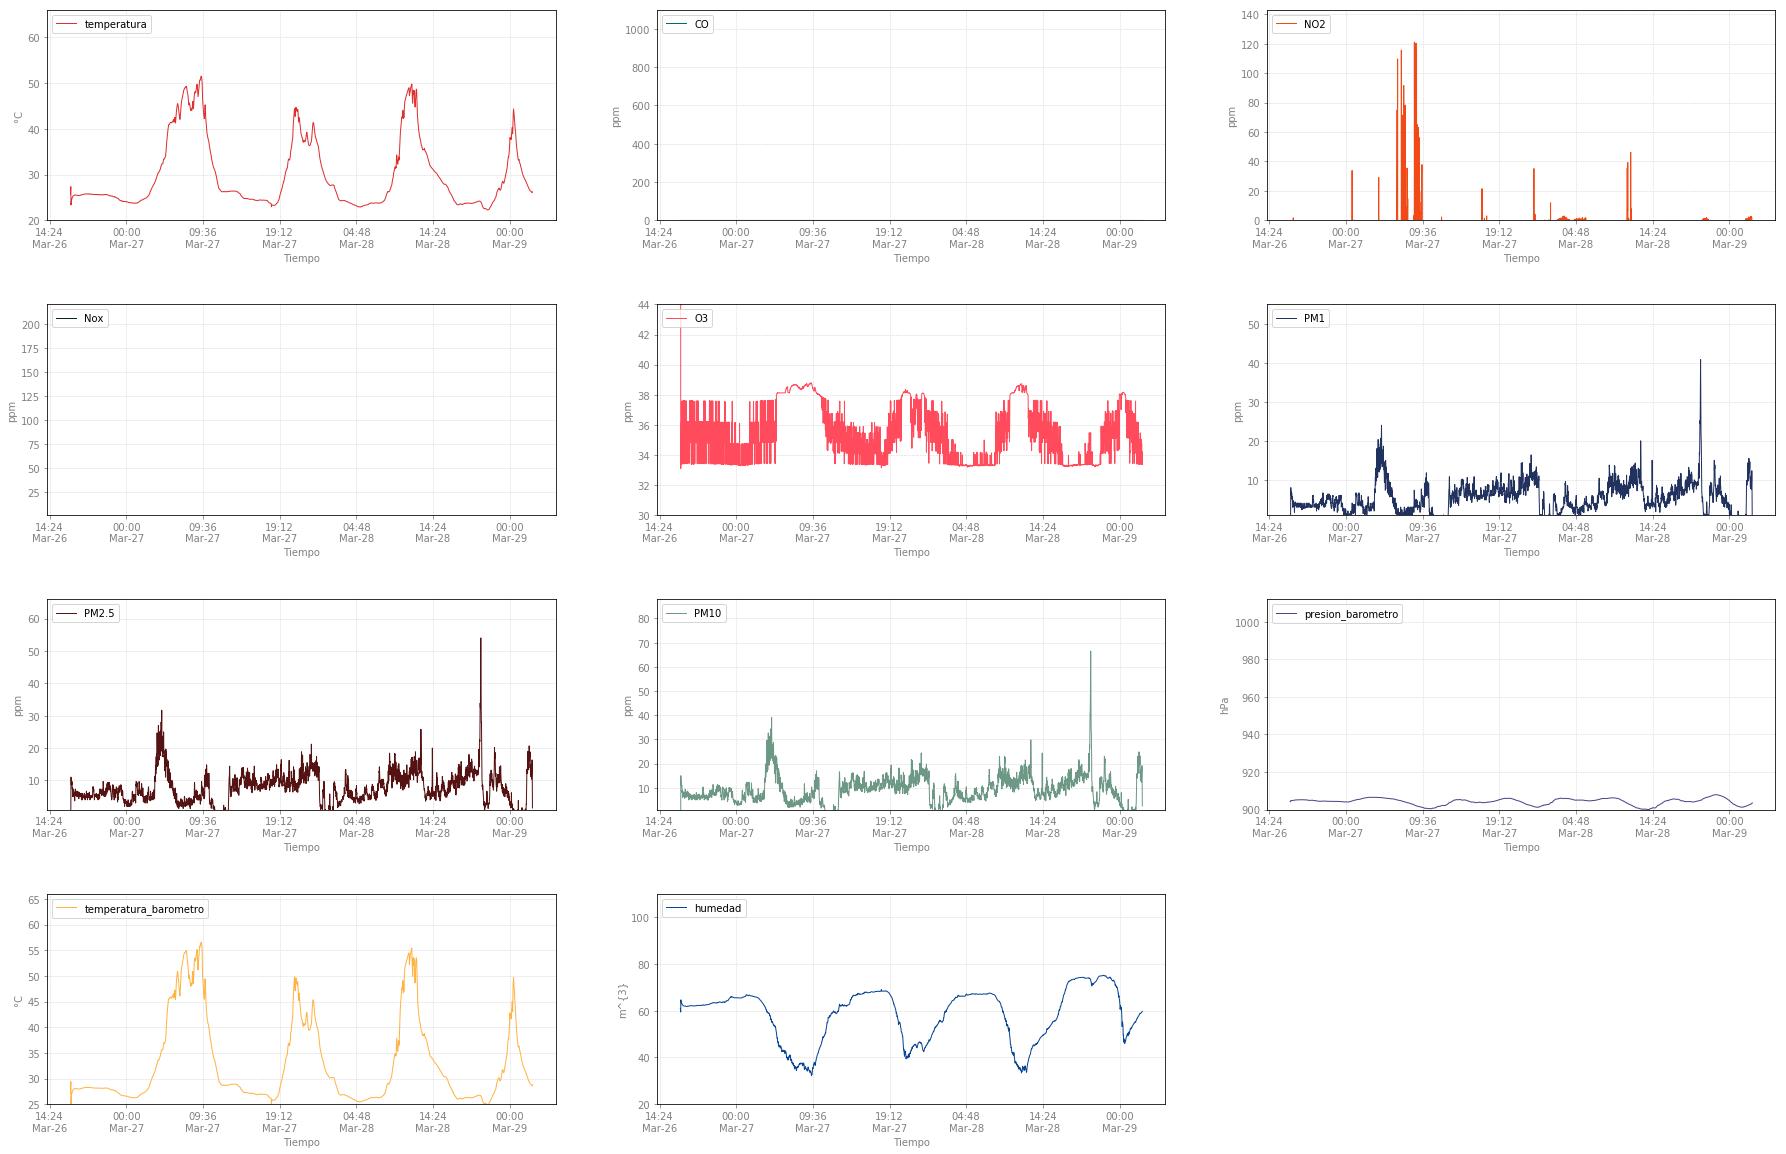

In [192]:
#Se genera una grafica
#Se crea la hoja donde se va a pintar
fig=plt.figure(figsize=(10,8))
#Se infica cuantas figuras tendrá la hoja 
gs = gridspec.GridSpec(4,3) #(filas, columnas.)

Temp = Datamanager.graphic(df_cali_simple,shape_figs=(4,3),position=[0,0],fig = fig,
                           variable = 'temperatura',minvar = 20,maxvar = 60,unit='°C',color = '#DF2E2E')
CO = Datamanager.graphic(df_cali_simple,shape_figs=(4,3),position=[0,1],fig = fig,
                         variable = 'CO',minvar = 0,maxvar = 1000,unit='ppm',color = '#056674')
NO2 = Datamanager.graphic(df_cali_simple,shape_figs=(4,3),position=[0,2],fig = fig,
                          variable = 'NO2',minvar = 0,maxvar = 130,unit='ppm',color = '#F14A16')
NOx = Datamanager.graphic(df_cali_simple,shape_figs=(4,3),position=[1,0],fig = fig,
                          variable = 'Nox',minvar = 1,maxvar = 200,unit='ppm',color = '#072227')
O3 = Datamanager.graphic(df_cali_simple,shape_figs=(4,3),position=[1,1],fig = fig,
                         variable = 'O3',minvar = 30,maxvar = 40,unit='ppm',color = '#FF4B5C')
PM01 = Datamanager.graphic(df_cali_simple,shape_figs=(4,3),position=[1,2],fig = fig,
                           variable = 'PM1',minvar = 1,maxvar = 50,unit='ppm',color = '#21325E')
PM2_5 = Datamanager.graphic(df_cali_simple,shape_figs=(4,3),position=[2,0],fig = fig,
                            variable = 'PM2.5',minvar = 1,maxvar = 60,unit='ppm',color = '#541212')
PM10 = Datamanager.graphic(df_cali_simple,shape_figs=(4,3),position=[2,1],fig = fig,
                           variable = 'PM10',minvar = 1,maxvar = 80,unit='ppm',color = '#6D9886')
Press = Datamanager.graphic(df_cali_simple,shape_figs=(4,3),position=[2,2],fig = fig,
                            variable = 'presion_barometro',minvar = 900,maxvar = 920,unit='hPa',color = '#533E85')
Temp = Datamanager.graphic(df_cali_simple,shape_figs=(4,3),position=[3,0],fig = fig,
                           variable = 'temperatura_barometro',minvar = 25,maxvar = 60,unit='°C',color = '#FFB344')
HM = Datamanager.graphic(df_cali_simple,shape_figs=(4,3),position=[3,1],fig = fig,
                         variable = 'humedad',minvar = 20,maxvar = 100,unit='m^{3}',color = '#084594')

plt.subplots_adjust(left=0.1, bottom=0.1, right=2.5,top=2,wspace=0.2,hspace=0.4)
plt.savefig(f'{path_save}Series_Simple_Cali.png',bbox_inches="tight",
                                                    dpi = 200)

In [157]:
df_cali_vais['O3 (ug/m3)'].min()

-4.6

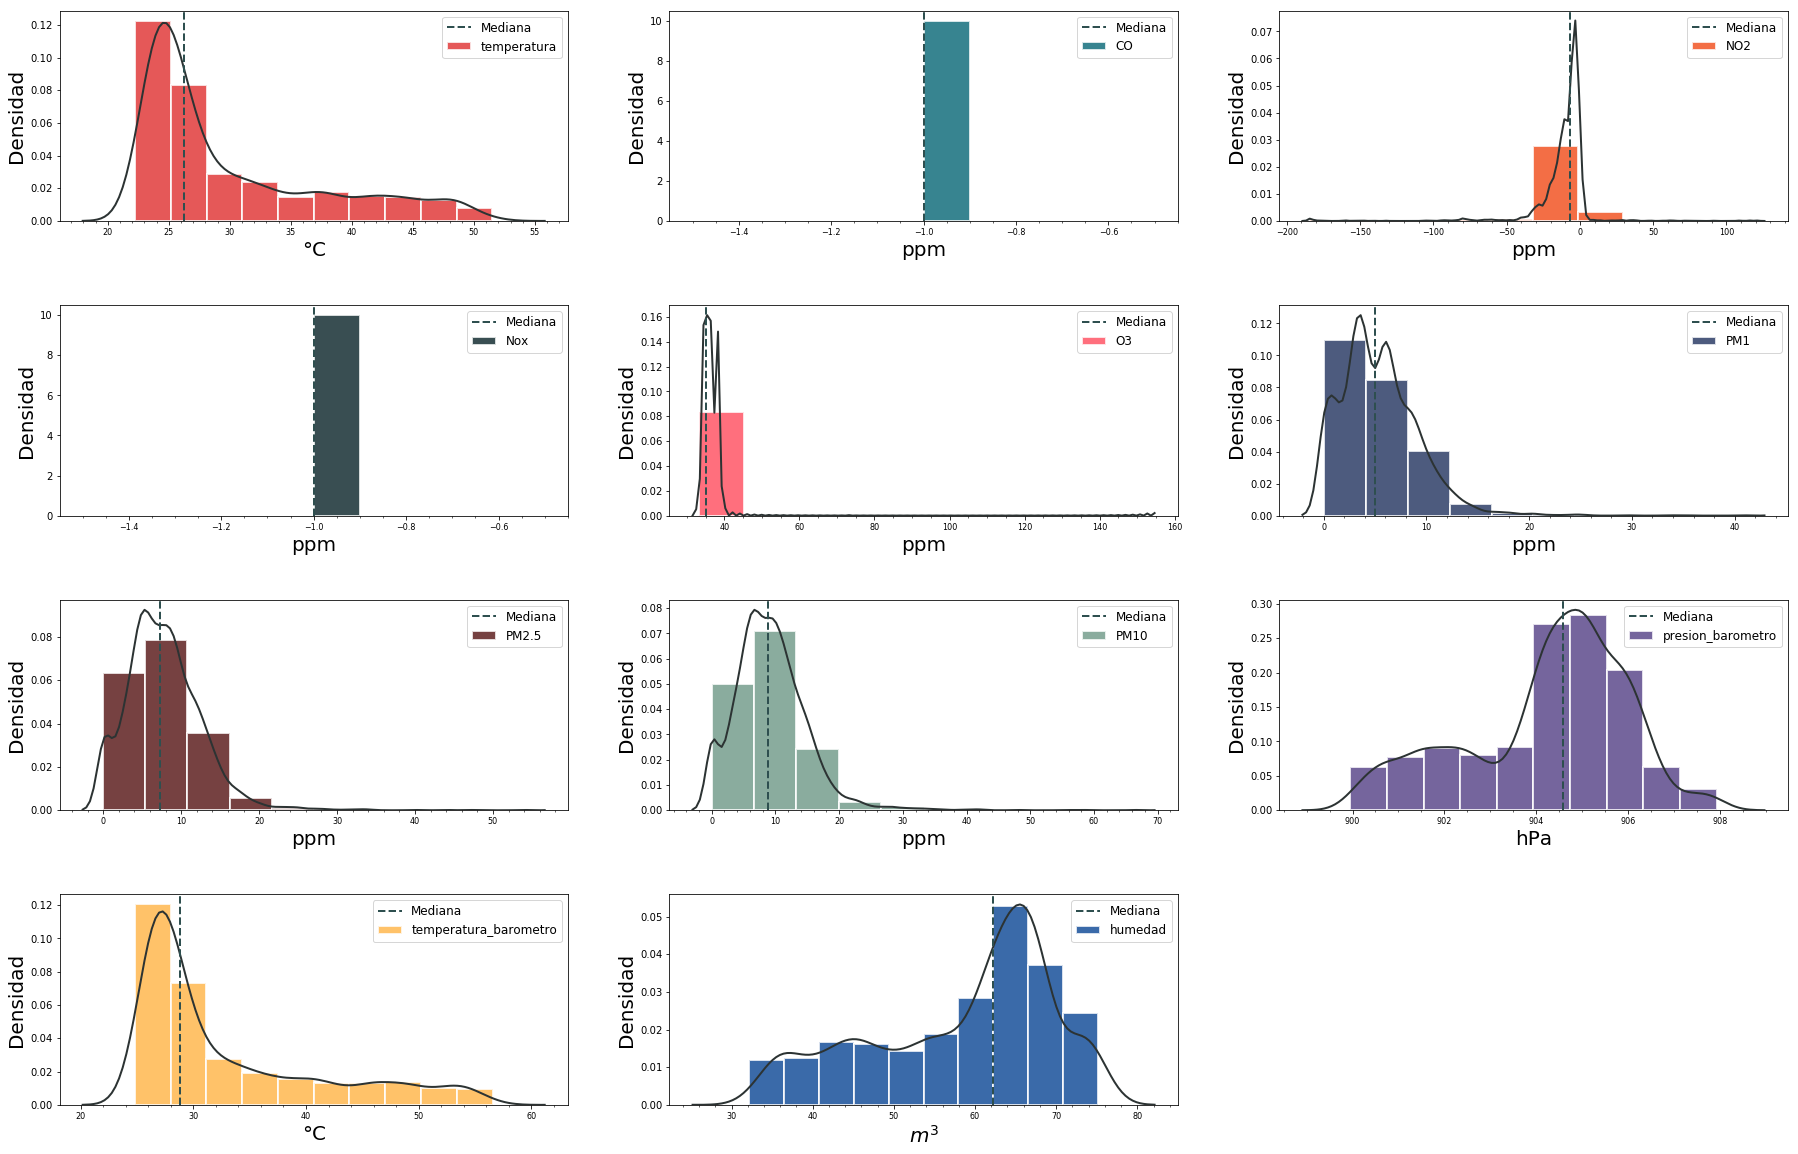

In [208]:
#Se genera una grafica
#Se crea la hoja donde se va a pintar
fig=plt.figure(figsize=(10,8))
#Se infica cuantas figuras tendrá la hoja 
gs = gridspec.GridSpec(4,3) #(filas, columnas)

Temp = Datamanager.histogram(df_cali_simple,shape_figs=(4,3),position=[0,0],fig = fig,
                           variable = 'temperatura',unit='°C', color_hist = '#DF2E2E')
CO = Datamanager.histogram(df_cali_simple,shape_figs=(4,3),position=[0,1],fig = fig,
                         variable = 'CO',unit='ppm',color_hist = '#056674')
NO2 = Datamanager.histogram(df_cali_simple,shape_figs=(4,3),position=[0,2],fig = fig,
                          variable = 'NO2',unit='ppm',color_hist = '#F14A16')
NOx = Datamanager.histogram(df_cali_simple,shape_figs=(4,3),position=[1,0],fig = fig,
                          variable = 'Nox',unit='ppm',color_hist = '#072227')
O3 = Datamanager.histogram(df_cali_simple,shape_figs=(4,3),position=[1,1],fig = fig,
                         variable = 'O3',unit='ppm',color_hist = '#FF4B5C')
PM01 = Datamanager.histogram(df_cali_simple,shape_figs=(4,3),position=[1,2],fig = fig,
                           variable = 'PM1',unit='ppm',color_hist = '#21325E')
PM2_5 = Datamanager.histogram(df_cali_simple,shape_figs=(4,3),position=[2,0],fig = fig,
                            variable = 'PM2.5',unit='ppm',color_hist = '#541212')
PM10 = Datamanager.histogram(df_cali_simple,shape_figs=(4,3),position=[2,1],fig = fig,
                           variable = 'PM10',unit='ppm',color_hist = '#6D9886')
Press = Datamanager.histogram(df_cali_simple,shape_figs=(4,3),position=[2,2],fig = fig,
                            variable = 'presion_barometro',unit='hPa',color_hist = '#533E85')
Temp = Datamanager.histogram(df_cali_simple,shape_figs=(4,3),position=[3,0],fig = fig,
                           variable = 'temperatura_barometro',unit='°C',color_hist = '#FFB344')
HM = Datamanager.histogram(df_cali_simple,shape_figs=(4,3),position=[3,1],fig = fig,
                         variable = 'humedad',unit=r'$m^{3}$',color_hist = '#084594')

plt.subplots_adjust(left=0.1, bottom=0.1, right=2.5,top=2,wspace=0.2,hspace=0.4)
plt.savefig(f'{path_save}Histo_Simple_Cali.png',bbox_inches="tight",
                                                    dpi = 200)

In [1]:
### PDF DATA ORIGINAL ###
#Recortamos los datos de simple que tienen mas que df_vaisala
Simple_cut = df_cali_simple.iloc[:len(df_cali_vais)]
#Instanciamos la clase Calibrator 
Datamanager_Simple = DataManager(dataframe = Simple_cut)
Datamanager_Simple.load_data()
calibrator_simple = Calibrator(Datamanager_Simple)
#Creamos un objeto DataManager a partir del df vaisala
Datamanager_vaisala = DataManager(dataframe = df_cali_vais)
Datamanager_vaisala.load_data()
calibrator_simple.load_reference(Datamanager_vaisala)

path_template = ('/media/juan/Disco_Juan/SImple2/Codigos/ML-predictive-model/Simple_Analytics/Reports/templates/Plantilla_Simple.pdf')
path_out = ('/media/juan/Disco_Juan/SImple2/Resultados/Informes/')
path_fig = ('/media/juan/Disco_Juan/SImple2/Resultados/Graficas_Cali/')

vec_simple = ['presion_barometro',
       'temperatura_barometro', 'humedad', 'temperatura','CO', 'Nox', 
       'NO2', 'O3']

Vec_Vaisala = ['PRES (hPa)','TEMP (C)','HUM (%RH)','TEMP (C)','CO (ug/m3)',
                'NO (ug/m3)', 'NO2 (ug/m3)','O3 (ug/m3)']

#vec_simple = ['barometer_pressure', 'barometer_temperature',
#       'humidity', 'temperature', 'CO', 'NOx', 'NO2', 'O3']

for simple,vaisa in zip(vec_simple,Vec_Vaisala):
       report = calibrator_simple.reporte(variable_simple=[simple],
                     variable_reference=vaisa, name_report = simple)

list_pdf = os.listdir(path_out)
#Conocatenamos los PDFs
merger = PdfFileMerger()
for pdf_var in list_pdf:
    merger.append(path_out+pdf_var)

merger.write(path_out+"Reporte_Cali.pdf")
merger.close()

NameError: name 'df_cali_simple' is not defined